<a href="https://colab.research.google.com/github/MarkNoble-1/portfolio/blob/main/ENews_Business_Statistics_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Business Statistics: E-news Express


## Define Problem Statement and Objectives

**Business Context**

The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]

**Objective**

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

1. Do the users spend more time on the new landing page than on the existing landing page?
2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
3. Does the converted status depend on the preferred language?
4. Is the time spent on the new page the same for the different language users?


**Data Dictionary**

The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

1. user_id - Unique user ID of the person visiting the website
2. group - Whether the user belongs to the first group (control) or the second group (treatment)
3. landing_page - Whether the landing page is new or old
4. time_spent_on_the_page - Time (in minutes) spent by the user on the landing page
5. converted - Whether the user gets converted to a subscriber of the news portal or not
6. language_preferred - Language chosen by the user to view the landing page

**Problem Statement:**

In order to compete in a growing electronic news market, E-news Express needs to increase the number of subscribers it has to its platform. E-news has conducted an A/B test on a random sample of 100 users, with the desired outcome of determining what factors are important in users subscribing, and to determine if the creation of the new landing page will help increase subscriptions as compared to the old landing page.

**Objectives:**

- Based on the given information, we are to analyze the A/B testing conducted on users to determine with what confidence we can answer the following questions:

1. Do the users spend more time on the new landing page than on the existing landing page?
2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
3. Does the converted status depend on the preferred language?
4. Is the time spent on the new page the same for the different language users?

- We also need to determine if factors like preferred language have any affect on converting subscribers.


## Import all the necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scipy==1.11.4 -q --user
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats

In [ ]:
#import the required functions
from scipy.stats import ttest_ind

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

## Reading the Data into a DataFrame

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
AB = pd.read_csv('/content/drive/MyDrive/Python Course/Business Statistics/abtest.csv')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Python Course/Business Statistics
!jupyter nbconvert "Data Science & Business Analytics - Statistics Project.ipynb" --to html

/content/drive/MyDrive/Python Course/Business Statistics
[NbConvertApp] Converting notebook Data Science & Business Analytics - Statistics Project.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 13 image(s).
[NbConvertApp] Writing 689191 bytes to Data Science & Business Analytics - Statistics Project.html


## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

#### First and last 5 rows of dataset

In [ ]:
AB.head() #first 5 rows

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [ ]:
AB.tail() #last 5 rows

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


Observations:

- the data looks as expected

#### Shape of the data set

In [ ]:
AB.shape #number of rows and columns of the dataset

(100, 6)

Observations: there are 100 rows and 6 columns in the dataset

#### Datatype Information & Duplicates

In [ ]:
AB.info() #datatype information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [ ]:
AB['user_id'].duplicated().any()


False

Observations:

- There are 100 values in each row, and no rows have a null value
- There are 4 columns with object datatypes, 1 with float datatype, and one with integer datatype
-there are no duplicates of Customer ID, meaning each row is unique customer data

#### Statistical description of numerical values

In [ ]:
AB.describe(include=[np.number]) #statistical description of numerical values

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


Observations:
- The average time spent on the page is 5.3 minutes, with a standard devation of 2.3 minutes
- the minimum amount of time spent on the page is .19 minutes (11 seconds)
- the maximum amount of time spent on the page is 10.7 minutes

#### Statistical description of categorical values

In [ ]:
AB.describe(include=[object]) #statistical description of categorical values

,group,landing_page,converted,language_preferred
count,100,100,100,100
unique,2,2,2,3
top,control,old,yes,Spanish
freq,50,50,54,34


Observations:
- group, landing_page, converted are have binary values
- there are only 3 different languages in the language prefered column
- control shows as the top value for group, but also shows a fequency of 50, meaning both control and treatment are equal
- more customers in this datasheet converted than did not

### Univariate Analysis

#### user_id

In [ ]:
AB['user_id'].nunique() #number of unique customer ID's in the dataset

100

Observations: There are 100 unique customer ID's in the data set, and as shown above, there are no duplicates

#### group

In [ ]:
AB['group'].value_counts() #number of customers in the control and treatment groups

,count
group,
control,50
treatment,50


Observations: There are an equal number of control and treatment group customers in the dataset

#### landing_page

In [ ]:
AB['landing_page'].value_counts() #number of customers in the old and new landing page groups

,count
landing_page,
old,50
new,50


Observations: as expected from the equal number of control and treatment values in 'group', there are an equal number of old and new landing page customers in the dataset

####time_spent_on_the_page

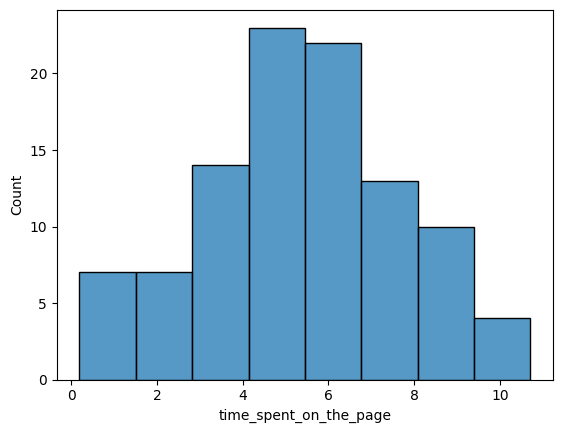

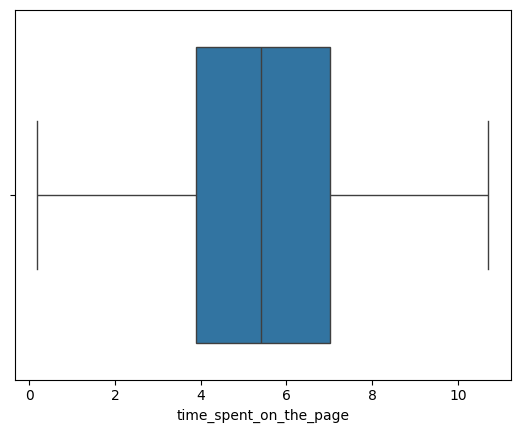

In [ ]:
sns.histplot(data=AB, x='time_spent_on_the_page') #histogram of time spent on the page
plt.show()
sns.boxplot(data=AB, x='time_spent_on_the_page') #box plot of time spent on the page
plt.show()

Observations:

- The distribution of time_spent_on_the_page is approximately normally distributed, with the median time at about 5.4 minutes.
- 50% of the time spent on the page is between approximately 4 and 7 minutes.
- There are no outliers in the dataset

#### converted

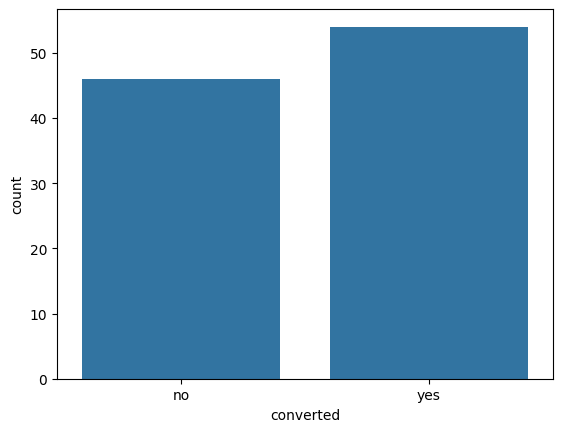

In [ ]:
sns.countplot(data=AB, x='converted') #countplot of converted
plt.show()

In [ ]:
AB['converted'].value_counts() #number of customers converted and did not convert

,count
converted,
yes,54
no,46


Observations:
- More customers were converted as subscribers than were not in this dataset.
- 54 customers converted, 46 did not

#### language_preferred

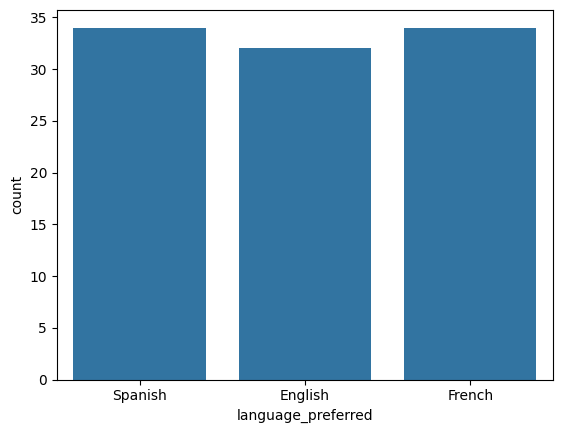

In [ ]:
sns.countplot(data=AB, x='language_preferred') #countplot of language preferred
plt.show()

In [ ]:
AB['language_preferred'].value_counts() #number of customers in each language

,count
language_preferred,
Spanish,34
French,34
English,32


Observations:
- the language preferred by customers in this dataset is approximately uniformly distributed
- spanish and french are equally most preferred at 34 customers each, and english is slightly less preferred at 32 customers in this dataset

### Bivariate Analysis

#### Landing Page and Time Spent on the Page

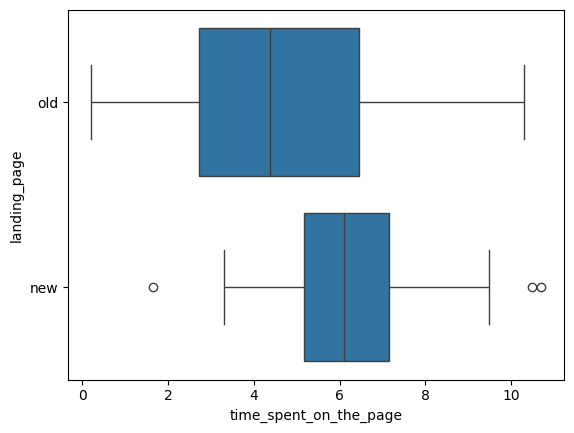

In [ ]:
sns.boxplot(data=AB, x='time_spent_on_the_page', y='landing_page') #box plot of time spent on the page separated by new and old landing page users
plt.show()

In [ ]:
AB.groupby('landing_page')['time_spent_on_the_page'].mean() #mean time spent on the page separated by new and old landing page users

,time_spent_on_the_page
landing_page,
new,6.2232
old,4.5324


Observations:

- Users in the treatment group who saw the new landing page spent an average of 6.2 minutes on the page, and 75% of them spent about 3-7 minutes on the page

- Users in the control group who saw the old landing page spent an average of 4.5 minutes on the page, and 75% of them spent between less than a minute and 6.25 minutes on the page.

- The new landing page has outliers with on datapoint lying below 2 minutes and 2 data points above 10 minutes.


#### Landing Page and Converted

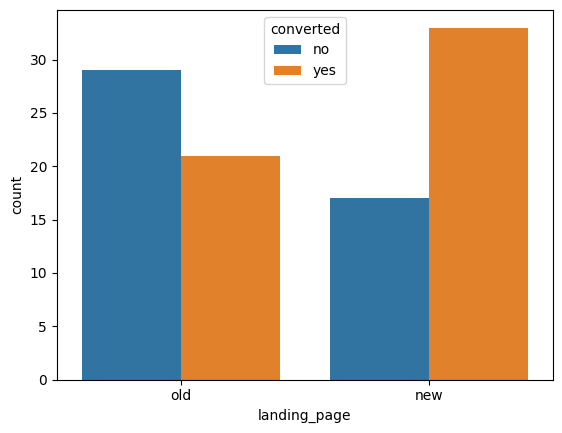

In [ ]:
sns.countplot(data=AB, x='landing_page', hue='converted') #countplot of converted separated by new and old landing page users
plt.show()

In [ ]:
AB.groupby('landing_page')['converted'].value_counts() #number of customers converted and did not separated by new and old landing page users

landing_page  converted
new           yes          33
              no           17
old           no           29
              yes          21
Name: count, dtype: int64

Observations:

- 33 users in the treatment group assigned to the new landing page converted to become subscribers, 17 did not
- 21 users in the control group assigned to the old landing page converted to become subscribers, 29 did not
- more users in the treatment group converted to become subscribers than did not
- less users in the treatment group converted to become subscribers than did not

#### Time Spent on the Page and Converted

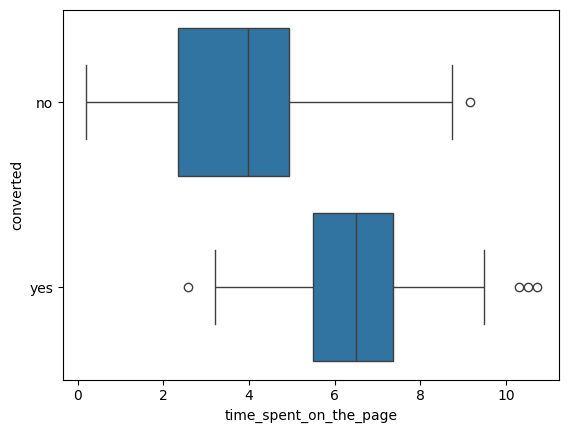

In [ ]:
sns.boxplot(data=AB, x='time_spent_on_the_page', y='converted') #box plot of time spent on the page separated by converted
plt.show()

In [ ]:
AB.groupby('converted')['time_spent_on_the_page'].mean()  #mean time spent on the page separated by converted

,time_spent_on_the_page
converted,
no,3.915870
yes,6.623148


Observations:

- customers who did not convert to become subscribers spent an average of 3.9 minutes on the page, and 75% of them spent less than about 5 minutes on the page
- customers who did convert to become subscribers spent and average of 6.6 minutes on the page and 75% of them spent greater than about 5.75 minutes.
-both distributions contain outliers

#### Language preferred vs Time Spent on the Page

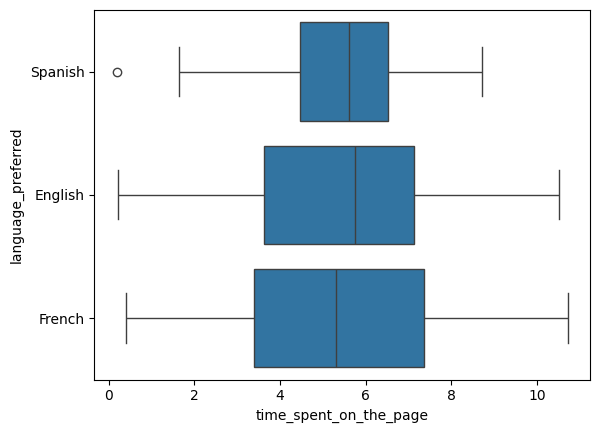

In [ ]:
sns.boxplot(data=AB, x='time_spent_on_the_page', y='language_preferred') #box plot of time spent on the page separated by language preferred
plt.show()

In [ ]:
AB.groupby('language_preferred')['time_spent_on_the_page'].mean() #mean time spent on the page separated by language preferred

,time_spent_on_the_page
language_preferred,
English,5.559062
French,5.253235
Spanish,5.331765


Observations:

- Spanish preferred users had the least variability in their time spent on the page, with one outlier.
- The average time spent on the page for all users is around 5 minutes regardless of preferred language
- 75% of all users regardless of language spent less than 8 minutes on the landing page

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

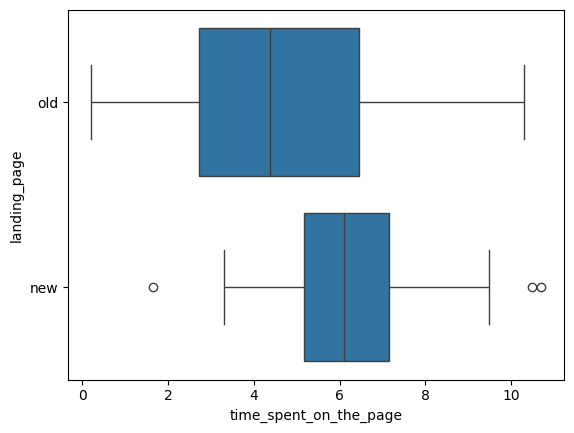

In [ ]:
sns.boxplot(data=AB, x='time_spent_on_the_page', y='landing_page') #box plot of time spent on the page separated by new and old landing page users
plt.show()

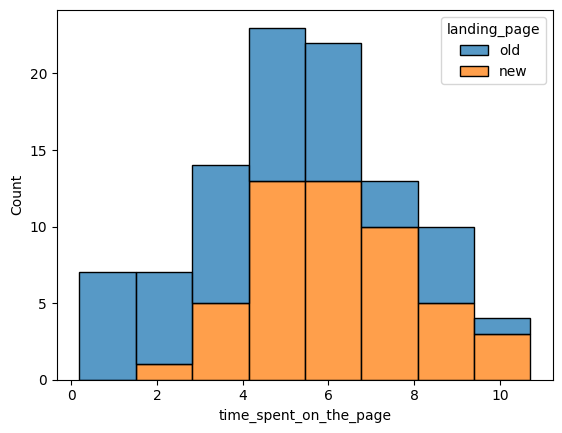

In [ ]:
sns.histplot(data=AB, x='time_spent_on_the_page', hue='landing_page', multiple='stack') #histogram of time spent on the page separated by new and old landing page users
plt.show()

Observations:

- Users in the treatment group had less variability in their time spent on the page than the control group and 75% of them spent about 3-7 minutes on the page

- Users in the control group who saw the old landing page had more variability in their time spent on the page than the treatment group and 75% of them spent between less than a minute and 6.25 minutes on the page.

- The new landing page has outliers with on datapoint lying below 2 minutes and 2 data points above 10 minutes.

### Step 1: Define the null and alternate hypotheses

H0: Users spend less than or equal time on the new landing page than on the old one

Ha: Users spend more time on the new landing page than on the old one

### Step 2: Select Appropriate test

- Continuous data?
  - Yes, time_spent_on_the_page is continuous data
- Normally distributed populations?
  - Yes, despite the slight right skew of the distributions, we are safe to assume normal distribution as the shape of the data is approximately normal
- Independent populations?
  - Yes, the control group and the treatment group are separate and independent of one another as the treatment group was loaded onto the new page, and the control group was loaded onto the old page
- Unequal sample standard deviations?
  - Yes, as seen from Step 4
- Random sampling from the population?
  - Yes, we are informed that the users were selected randomly.

Observations: Based on the above, and the fact that we are dealing with two independant samples and 2 means, a 2-sample independent T test should be used


In [ ]:
from scipy.stats import ttest_ind #import the required functions

### Step 3: Decide the significance level

As provided in the problem statement, we are using a 5% confidence interval

$\alpha$ = 0.05

### Step 4: Collect and prepare data

In [ ]:
new_time_spent = AB[AB['landing_page'] == 'new']['time_spent_on_the_page'] # Filter data for 'new' landing page and extract time spent
old_time_spent = AB[AB['landing_page'] == 'old']['time_spent_on_the_page'] # Filter data for 'old' landing page and extract time spent

AB['new_time_spent'] = new_time_spent                                     # Assign filtered new time spent to a new column
AB['old_time_spent'] = old_time_spent                                     # Assign filtered old time spent to a new column


new_time_spent.std(), old_time_spent.std()                                # Calculate and compare the standard deviation of time spent on new vs old landing pages

(1.8170310387878263, 2.581974849306046)

In [ ]:
new_time_spent.mean(), old_time_spent.mean()                              # Calculate and compare the mean of time spent on new vs old landing pages

(6.2232, 4.532400000000001)

In [ ]:
AB.head() #confirm new time spent and old time spent are added to AB

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred,new_time_spent,old_time_spent
0,546592,control,old,3.48,no,Spanish,NaN,3.48
1,546468,treatment,new,7.13,yes,English,7.13,NaN
2,546462,treatment,new,4.40,no,Spanish,4.40,NaN
3,546567,control,old,3.02,no,French,NaN,3.02
4,546459,treatment,new,4.75,yes,Spanish,4.75,NaN


Observations: The standard deviation of time spent on the new page and time spent on the old page are unequal

### Step 5: Calculate the p-value

In [ ]:
test_stat, p_value = ttest_ind(AB['new_time_spent'].dropna(), AB['old_time_spent'].dropna(), equal_var = False, alternative = 'greater') # find the p-value
p_value

0.0001392381225166549

Observations: the P Value is .000139

### Step 6: Compare the p-value with $\alpha$

Observations:
- $\alpha$ = .05
- P_value = .000139




### Step 7:  Draw inference

Observations:

- With a P Value of .000139 which is less than the level of significance of .05, we can reject the null hypothesis.

- Users spend more time on the new landing page than they do on the old one

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

#### Perform Visual Analysis

<Axes: xlabel='landing_page', ylabel='count'>

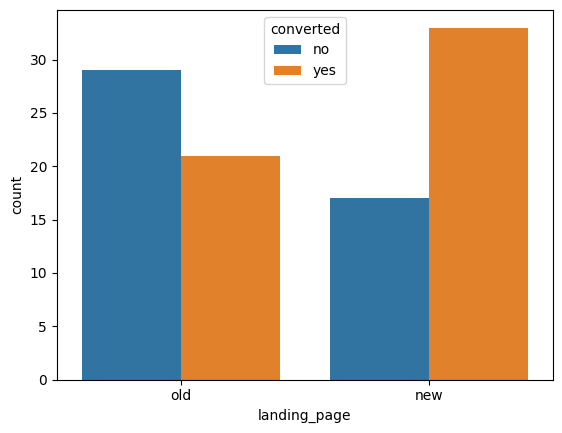

In [ ]:
sns.countplot(data=AB, x='landing_page', hue='converted') #countplot for landing page and converted

In [ ]:
AB.groupby('landing_page')['converted'].value_counts() #group landing page and converted and find value counts of each

landing_page  converted
new           yes          33
              no           17
old           no           29
              yes          21
Name: count, dtype: int64

Observations:
- more users in the treatment group converted to become subscribers than did not
- less users in the treatment group converted to become subscribers than did not

#### Step 1: Define the null and alternate hypotheses

H0: the converstion rate for the new page is equal to or less than the conversion rate for the old page

Ha:  the converstion rate for the new page is the greater than the conversion rate for the old page

#### Step 2: Select Appropriate test

- Binomally distributed population?
  - Yes, a user either subscribed or did not
- Random sampling from the population?
  - Yes, we are informed that the users were selected randomly.
- Can the binomial distribution approximated to normal distribution?
  - Yes
    - np1 = 50 * 33/50 = 50 which is greater than 10
    - n(1-p1) = 50 * (50-33)/50 = 17 which is greater than 10
    - np2 = 50 * 21/50 = 21 which is greater than 10
    - n(1-p2) = 50 * (50-21)/50 = 29 which is greater than 10

Observations: a Two Proportion Z-test can be used

In [ ]:
# import the required fuction
from statsmodels.stats.proportion import proportions_ztest

#### Step 3: Decide the significance level

As provided in the problem statement, we are using a 5% confidence interval

α  = 0.05

#### Step 4: Collect and prepare data

In [ ]:
new_converted = AB[AB['landing_page'] == 'new']['converted'].value_counts()['yes'] # Filter data for 'new' landing page and extract converted
old_converted = AB[AB['landing_page'] == 'old']['converted'].value_counts()['yes'] # Filter data for 'old' landing page and extract converted

total_new = AB[AB['landing_page'] == 'new']['converted'].count()                   # Filter data for 'new' landing page and extract total
total_old = AB[AB['landing_page'] == 'old']['converted'].count()                   # Filter data for 'old' landing page

new_converted, old_converted, total_new, total_old

(33, 21, 50, 50)

Observations:
- 33 users from the treatment group who visited the new page converted as subscribers
- 21 users from the control group who visited the old page converted as subscribers
- the total number of users in the treatment group who visited the new page was 50
-  the total number of users in the control group who visited the old page was 50

#### Step 5: Calculate the p-value

In [ ]:
test_stat, p_value = proportions_ztest(count = [new_converted, old_converted], nobs = [total_new, total_old], alternative = 'larger')
p_value

0.008026308204056278

#### Step 6: Compare the p-value with  α

Observations:

- α  = .05
- P_value = .008

#### Step 7: Draw inference

Observations:

- With a p-value of .008 which is less than the significance level of .05, we can reject the null hypothesis
- We can be statistically confident that the converstion rate for the new page is the greater than the conversion rate for the old page

## 3. Is the conversion and preferred language independent or related?

#### Perform Visual Analysis

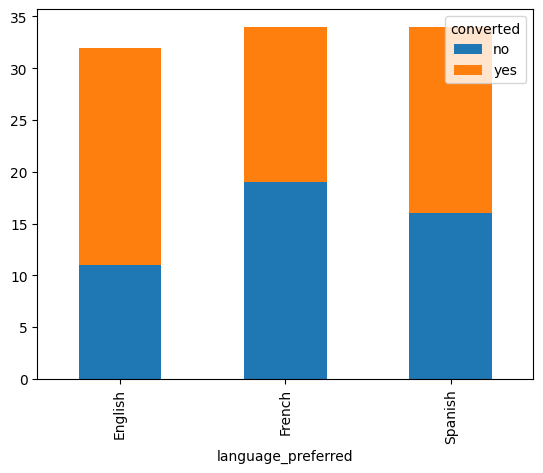

In [ ]:
language_converted_contingency = pd.crosstab(AB['language_preferred'], AB['converted']) #create a contingency table
language_converted_contingency.plot(kind='bar', stacked=True)                           #plot the contingency table
plt.show()

Observations:

- The proportion of users who converted is higher for English preferred users
- The proportion of users who did not convert is higher for French preferred users

#### Step 1: Define the null and alternate hypotheses

- H0: Conversion is independant of preferred language
- Ha: Conversion depends on preferred language

#### Step 2: Select Appropriate test

- Categorical variables?
  - Yes
- Value of the number of sample observations for each language is at least 5?
  - Yes, the number of observations for each language is greater than 5
- Random sampling from the population?
  - Yes, we are informed that the users were selected randomly

#### Step 3: Decide the significance level

As provided in the problem statement, we are using a 5% confidence interval

α = 0.05

#### Step 4: Collect and prepare data

In [ ]:
language_converted_contingency

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


Observations:

- English speakers had the most users converted
- French had the least users converted

#### Step 5: Calculate the p-value

In [ ]:
from scipy.stats import chi2_contingency #import the required function

chi2, p_value, dof, expected = chi2_contingency(language_converted_contingency)
p_value

0.2129888748754345

#### Step 6: Compare the p-value with  α

Observations:

- α = .05
- P_value = .21

#### Step 7: Draw inference

Observations:

- With a P-Value of .21 we fail to reject the null hypothesis

- Based on the chosen significance level of .05, conversion seems to be independent of preferred language

## 4. Is the time spent on the new page the same for the different language users?

#### Perform Visual Analysis

In [ ]:
AB_new_only = AB[AB['landing_page'] == 'new'] #filter data for only the new landing page
AB_new_only.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred,new_time_spent,old_time_spent
1,546468,treatment,new,7.13,yes,English,7.13,NaN
2,546462,treatment,new,4.40,no,Spanish,4.40,NaN
4,546459,treatment,new,4.75,yes,Spanish,4.75,NaN
6,546448,treatment,new,5.25,yes,French,5.25,NaN
8,546461,treatment,new,10.71,yes,French,10.71,NaN


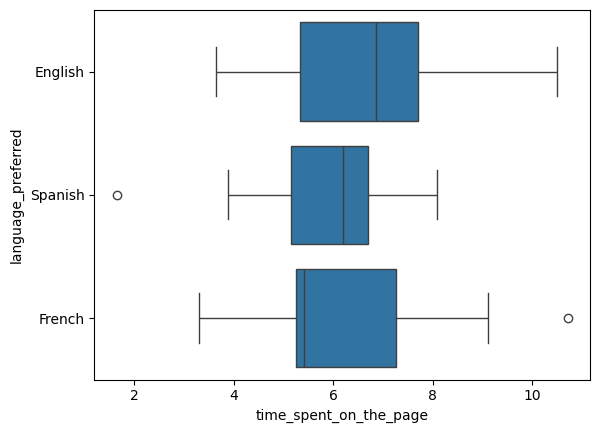

In [ ]:
sns.boxplot(data=AB_new_only, x='time_spent_on_the_page', y='language_preferred') #box plot of time spent on the page separated by language preferred
plt.show()

In [ ]:
AB_new_only.groupby('language_preferred')['time_spent_on_the_page'].mean() #mean time spent on the page separated by language preferred

,time_spent_on_the_page
language_preferred,
English,6.663750
French,6.196471
Spanish,5.835294


Observations:

- Spanish preferred users had the least variability in their time spent on the new page, with one outlier
- French users have the lowest median time spent on the new page, but have an outlier for the longest total time on the new page
- English users have the most variability for their time spent on the new page

#### Step 1: Define the null and alternate hypotheses

- H0: The time spent on the new page is the same for different language users
- Ha: The time spent on the new page is different for at least one group of language users

#### Step 2: Select Appropriate test

- As this is a problem concerning 3 population means, a one-way ANOVA test will be used

Shapiro-Wilk's Test:
- H0: The time spent on the page follows a normal distribution
- Ha: The time spent on the page does not follow a normal distribution

In [ ]:
from scipy.stats import shapiro                          #import shapiro
p_value = shapiro(AB_new_only['time_spent_on_the_page']) #determine P Value for assumption of normality
p_value

ShapiroResult(statistic=0.9857665382791863, pvalue=0.8040040364746845)

With a p-value of .8 which is greater than the significance level of .05, we fail to reject the null hypothesis that time spent on the page follows a normal distribution

Levene's Test

- H0: All variances within time spent on the page are equal
- Ha: At least one variance within time spent on the page is not equal to the rest

In [ ]:
from scipy.stats import levene #import levene


In [ ]:
english_time = AB_new_only[AB_new_only['language_preferred'] == 'English']['time_spent_on_the_page'].dropna() #create a series for English users and their time spent on the page with no null values
french_time = AB_new_only[AB_new_only['language_preferred'] == 'French']['time_spent_on_the_page'].dropna()   #create #create a series for French users and their time spent on the page with no null values
spanish_time = AB_new_only[AB_new_only['language_preferred'] == 'Spanish']['time_spent_on_the_page'].dropna() #create a series for Spanish  users and their time spent on the page with no null values


In [ ]:
p_value = statistic, p_value = levene(english_time, french_time, spanish_time)
p_value

0.46711357711340173

With a p-value of .46 which is greater than the significance level of .05, we fail to reject the null hypothesis that variances within time spent on the page are equal

#### Step 3: Decide the significance level

As provided in the problem statement, we are using a 5% confidence interval

- α = 0.05

#### Step 4: Collect and prepare data

In [ ]:
english_time = AB_new_only[AB_new_only['language_preferred'] == 'English']['time_spent_on_the_page'].dropna() #create a series for English users and their time spent on the page with no null values
french_time = AB_new_only[AB_new_only['language_preferred'] == 'French']['time_spent_on_the_page'].dropna()   #create #create a series for French users and their time spent on the page with no null values
spanish_time = AB_new_only[AB_new_only['language_preferred'] == 'Spanish']['time_spent_on_the_page'].dropna() #create a series for Spanish  users and their time spent on the page with no null values


#### Step 5: Calculate the p-value

In [ ]:
from scipy.stats import f_oneway #import f_oneway
p_value = f_oneway(english_time, french_time, spanish_time)
p_value

F_onewayResult(statistic=0.8543992770006822, pvalue=0.43204138694325955)

#### Step 6: Compare the p-value with  α

Observations:

- α = .05
- P_value = .43

#### Step 7: Draw inference

Observations:

- With a P-Value of .43 we fail to reject the null hypothesis
- We can infer the time spent on the new page is the same for different language preferred users

## Conclusion and Business Recommendations

**Conclusions:**

- Based on our findings for Question 1 and 2, namely that the converstion rate for the new page is the greater than the conversion rate for the old page and that users spend more time on the new landing page than they do on the old one, we can be confident that the new landing page is more effective than the old landing page

- Based on our findings for Questions 3 and 4, namely that we can infer the time spent on the new page is the same for different language preferred users, and that the conversion rate seems to be independant of preferred language, no major changes need to be made in regards to targeting different language groups differently



**Recommendations:**

- Move all users to the new page, as we can have increased confidence in its success to increase subscriptions based on our statistical analysis

- Conducting another experiment and gathering data on user interaction with certain features on the new page may help narrow which features are most effective in converting users such as pop ups, videos, rolling headlines, etc.

___